<ipython-input-5-78fbd89b0879>:19: DtypeWarning: Columns (1,3) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv('/content/UNSW-NB15_1.csv', names=header)


Computational Time: 21.53 seconds
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     74048
           1       0.69      1.00      0.82      1616

    accuracy                           0.99     75664
   macro avg       0.84      1.00      0.91     75664
weighted avg       0.99      0.99      0.99     75664

Precision: 0.9933416741026319
Recall: 0.9903256502431804
F1 Score: 0.9911948647660951
Accuracy: 0.9903256502431804
Confusion Matrix:
 [[73316   732]
 [    0  1616]]


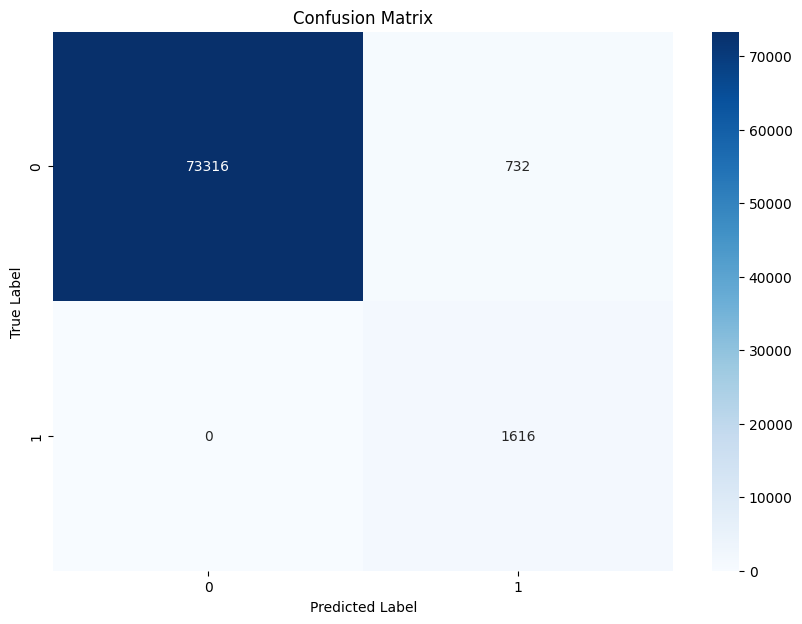

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time

# Load the dataset
header = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl',
          'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
          'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit',
          'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports',
          'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst',
          'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label']
data = pd.read_csv('/content/UNSW-NB15_1.csv', names=header)
data.replace(to_replace='-', value=np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)

# Convert specific columns to float
data['sport'] = data['sport'].astype(str).astype(float)
data['dsport'] = data['dsport'].astype(str).astype(float)

# Separate categorical and numerical columns
numerical_columns = ['dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'stcpb', 'dtcpb',
                     'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
                     'synack', 'ackdat']
categorical_columns = ['srcip', 'dstip', 'sport', 'dsport', 'proto', 'state', 'sttl', 'dttl', 'sloss', 'dloss',
                       'service', 'swin', 'dwin', 'trans_depth', 'res_bdy_len', 'is_sm_ips_ports', 'ct_state_ttl',
                       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
                       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

# Preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
scaler = preprocessing.StandardScaler()
for col in numerical_columns:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

# Splitting the data into features and labels
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Start the timer for the hybrid model training and prediction
start_time = time.time()

# Hybrid Model: RF for feature selection + NB for classification
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
feature_importances = rf_model.feature_importances_

# Selecting the top 10 important features
important_features = np.argsort(feature_importances)[-10:]
X_train_important = X_train.iloc[:, important_features]
X_test_important = X_test.iloc[:, important_features]

# Training Naive Bayes model on selected features
nb_model = GaussianNB()
nb_model.fit(X_train_important, y_train)

# Making predictions
predictions = nb_model.predict(X_test_important)

# End the timer and calculate the duration
end_time = time.time()
duration = end_time - start_time
print("Computational Time: {:.2f} seconds".format(duration))

# Evaluating the model
print(classification_report(y_test, predictions))

# Calculating and printing Precision, Recall, F1 Score individually
precision = precision_score(y_test, predictions, average='weighted')  # Use 'macro' for unweighted
recall = recall_score(y_test, predictions, average='weighted')  # Use 'macro' for unweighted
f1 = f1_score(y_test, predictions, average='weighted')  # Use 'macro' for unweighted
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

# Accuracy
accuracy = accuracy_score(y_test, predictions)
print("Accuracy:", accuracy)

# Confusion Matrix
confusion = confusion_matrix(y_test, predictions)
print("Confusion Matrix:\n", confusion)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()



Computational Time: 190.47 seconds
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     74042
           1       0.00      0.00      0.00      1622

    accuracy                           0.98     75664
   macro avg       0.49      0.50      0.49     75664
weighted avg       0.96      0.98      0.97     75664

Precision: 0.957585782108621
Recall: 0.9785631211672658
F1 Score: 0.9679608114232789
Accuracy: 0.9785631211672658


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classif

Confusion Matrix:
 [[74042     0]
 [ 1622     0]]


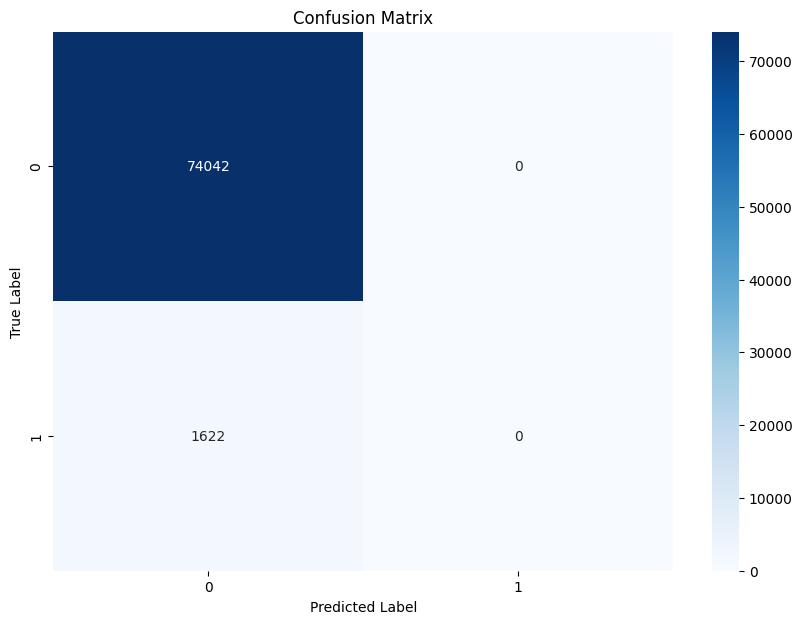

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time

# Load the dataset
header = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl',
          'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
          'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit',
          'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports',
          'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst',
          'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label']
data = pd.read_csv('/content/UNSW-NB15_1.csv', names=header, dtype={'sport': str, 'dsport': str})
data.replace(to_replace='-', value=np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)

# Convert specific columns to float
data['sport'] = data['sport'].astype(float)
data['dsport'] = data['dsport'].astype(float)

# Separate categorical and numerical columns
numerical_columns = ['dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'stcpb', 'dtcpb',
                     'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
                     'synack', 'ackdat']
categorical_columns = ['srcip', 'dstip', 'proto', 'state', 'sttl', 'dttl', 'sloss', 'dloss',
                       'service', 'swin', 'dwin', 'trans_depth', 'res_bdy_len', 'is_sm_ips_ports', 'ct_state_ttl',
                       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
                       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

# Preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
scaler = preprocessing.StandardScaler()
for col in numerical_columns:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

# Splitting the data into features and labels
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Start the timer for the SVM model training and prediction
start_time = time.time()

# SVM Model
svm_model = SVC(kernel='rbf', random_state=42)
svm_model.fit(X_train, y_train)

# Making predictions
svm_predictions = svm_model.predict(X_test)

# End the timer and calculate the duration
end_time = time.time()
duration = end_time - start_time
print("Computational Time: {:.2f} seconds".format(duration))

# Evaluating the model
print(classification_report(y_test, svm_predictions))

# Calculating and printing Precision, Recall, F1 Score individually
svm_precision = precision_score(y_test, svm_predictions, average='weighted')  # Use 'macro' for unweighted
svm_recall = recall_score(y_test, svm_predictions, average='weighted')  # Use 'macro' for unweighted
svm_f1 = f1_score(y_test, svm_predictions, average='weighted')  # Use 'macro' for unweighted
print("Precision:", svm_precision)
print("Recall:", svm_recall)
print("F1 Score:", svm_f1)

# Accuracy
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("Accuracy:", svm_accuracy)

# Confusion Matrix
svm_confusion = confusion_matrix(y_test, svm_predictions)
print("Confusion Matrix:\n", svm_confusion)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(svm_confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Computational Time: 12.95 seconds
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     74042
           1       1.00      1.00      1.00      1622

    accuracy                           1.00     75664
   macro avg       1.00      1.00      1.00     75664
weighted avg       1.00      1.00      1.00     75664

Precision: 0.9998947883247474
Recall: 0.9998942694015648
F1 Score: 0.9998943965953844
Accuracy: 0.9998942694015648
Confusion Matrix:
 [[74034     8]
 [    0  1622]]


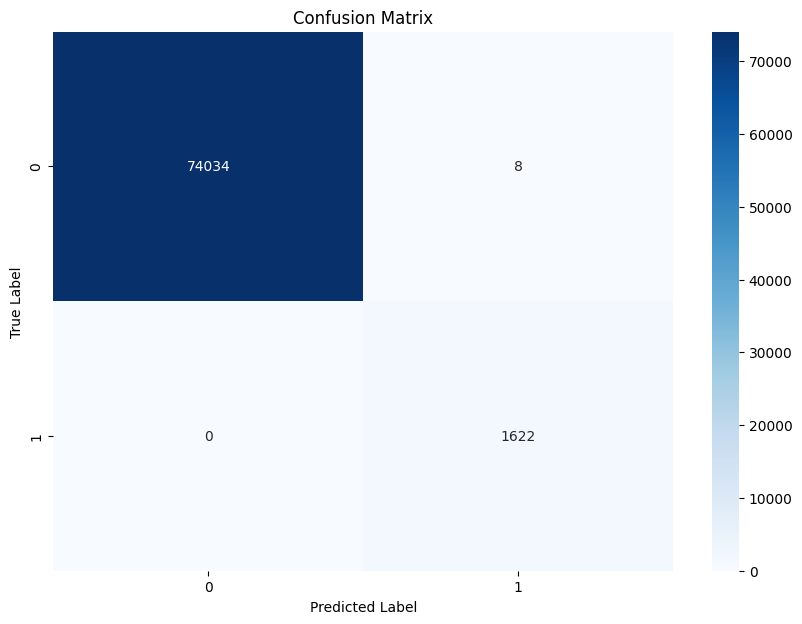

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time

# Load the dataset
header = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl',
          'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
          'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit',
          'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports',
          'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst',
          'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label']
data = pd.read_csv('/content/UNSW-NB15_1.csv', names=header, dtype={'sport': str, 'dsport': str})
data.replace(to_replace='-', value=np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)

# Convert specific columns to float
data['sport'] = data['sport'].astype(float)
data['dsport'] = data['dsport'].astype(float)

# Separate categorical and numerical columns
numerical_columns = ['dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'stcpb', 'dtcpb',
                     'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
                     'synack', 'ackdat']
categorical_columns = ['srcip', 'dstip', 'proto', 'state', 'sttl', 'dttl', 'sloss', 'dloss',
                       'service', 'swin', 'dwin', 'trans_depth', 'res_bdy_len', 'is_sm_ips_ports', 'ct_state_ttl',
                       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
                       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

# Preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
scaler = preprocessing.StandardScaler()
for col in numerical_columns:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

# Splitting the data into features and labels
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Start the timer for the Random Forest model training and prediction
start_time = time.time()

# Random Forest Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Making predictions
rf_predictions = rf_model.predict(X_test)

# End the timer and calculate the duration
end_time = time.time()
duration = end_time - start_time
print("Computational Time: {:.2f} seconds".format(duration))

# Evaluating the model
print(classification_report(y_test, rf_predictions))

# Calculating and printing Precision, Recall, F1 Score individually
rf_precision = precision_score(y_test, rf_predictions, average='weighted')  # Use 'macro' for unweighted
rf_recall = recall_score(y_test, rf_predictions, average='weighted')  # Use 'macro' for unweighted
rf_f1 = f1_score(y_test, rf_predictions, average='weighted')  # Use 'macro' for unweighted
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1)

# Accuracy
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Accuracy:", rf_accuracy)

# Confusion Matrix
rf_confusion = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix:\n", rf_confusion)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(rf_confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Computational Time: 94.45 seconds
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     74042
           1       0.98      0.43      0.60      1622

    accuracy                           0.99     75664
   macro avg       0.99      0.71      0.80     75664
weighted avg       0.99      0.99      0.99     75664

Precision: 0.9875641804433268
Recall: 0.9876030873334743
F1 Score: 0.9852022817672191
Accuracy: 0.9876030873334743
Confusion Matrix:
 [[74031    11]
 [  927   695]]


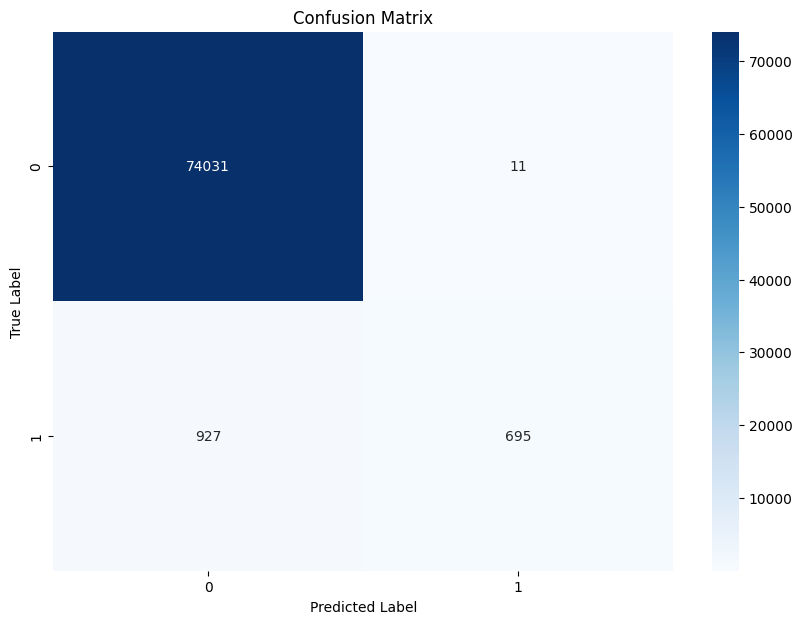

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
import time

# Load the dataset
header = ['srcip', 'sport', 'dstip', 'dsport', 'proto', 'state', 'dur', 'sbytes', 'dbytes', 'sttl',
          'dttl', 'sloss', 'dloss', 'service', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'swin', 'dwin',
          'stcpb', 'dtcpb', 'smeansz', 'dmeansz', 'trans_depth', 'res_bdy_len', 'Sjit', 'Djit',
          'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt', 'synack', 'ackdat', 'is_sm_ips_ports',
          'ct_state_ttl', 'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst',
          'ct_dst_ltm', 'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'Label']
data = pd.read_csv('/content/UNSW-NB15_1.csv', names=header, dtype={'sport': str, 'dsport': str})
data.replace(to_replace='-', value=np.nan, inplace=True)
data.dropna(axis=0, inplace=True)
data.drop_duplicates(inplace=True)

# Convert specific columns to float
data['sport'] = data['sport'].astype(float)
data['dsport'] = data['dsport'].astype(float)

# Separate categorical and numerical columns
numerical_columns = ['dur', 'sbytes', 'dbytes', 'Sload', 'Dload', 'Spkts', 'Dpkts', 'stcpb', 'dtcpb',
                     'smeansz', 'dmeansz', 'Sjit', 'Djit', 'Stime', 'Ltime', 'Sintpkt', 'Dintpkt', 'tcprtt',
                     'synack', 'ackdat']
categorical_columns = ['srcip', 'dstip', 'proto', 'state', 'sttl', 'dttl', 'sloss', 'dloss',
                       'service', 'swin', 'dwin', 'trans_depth', 'res_bdy_len', 'is_sm_ips_ports', 'ct_state_ttl',
                       'ct_flw_http_mthd', 'is_ftp_login', 'ct_ftp_cmd', 'ct_srv_src', 'ct_srv_dst', 'ct_dst_ltm',
                       'ct_src_ ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm']

# Preprocessing
label_encoder = preprocessing.LabelEncoder()
for col in categorical_columns:
    data[col] = label_encoder.fit_transform(data[col])
scaler = preprocessing.StandardScaler()
for col in numerical_columns:
    data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))

# Splitting the data into features and labels
X = data.drop('Label', axis=1)
y = data['Label']

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Start the timer for the KNN model training and prediction
start_time = time.time()

# KNN Model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

# Making predictions
knn_predictions = knn_model.predict(X_test)

# End the timer and calculate the duration
end_time = time.time()
duration = end_time - start_time
print("Computational Time: {:.2f} seconds".format(duration))

# Evaluating the model
print(classification_report(y_test, knn_predictions))

# Calculating and printing Precision, Recall, F1 Score individually
knn_precision = precision_score(y_test, knn_predictions, average='weighted')  # Use 'macro' for unweighted
knn_recall = recall_score(y_test, knn_predictions, average='weighted')  # Use 'macro' for unweighted
knn_f1 = f1_score(y_test, knn_predictions, average='weighted')  # Use 'macro' for unweighted
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1)

# Accuracy
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("Accuracy:", knn_accuracy)

# Confusion Matrix
knn_confusion = confusion_matrix(y_test, knn_predictions)
print("Confusion Matrix:\n", knn_confusion)

# Visualizing the Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(knn_confusion, annot=True, fmt='g', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()
